<a href="https://colab.research.google.com/github/222010303005/Final-Year-Mini-Project_7016/blob/main/LSTM_READY_DEPLOY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## <font> <font color="cyan" > Final Model to Deploy-LSTM: sentiment classification

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
# import re
# from autocorrect import spell
import regex as re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM

from keras.layers import Dropout

from sklearn import metrics

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/new_flipkart_labels.xlsx')
df.head()

Mounted at /content/drive


,Unnamed: 0,review,review_lemm,scores,compound_score,label
0,0,more flexible bass is very high sound clarity...,flexible bass high sound clarity good batter...,"{'neg': 0.092, 'neu': 0.528, 'pos': 0.38, 'com...",0.8934,pos
1,1,super sound and good looking i like that prize,super sound good look like prize,"{'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'comp...",0.9118,pos
2,2,very much satisfied with the device at this pr...,satisfied device price point awesome brand des...,"{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'comp...",0.9590,pos
3,3,nice headphone bass was very good and sound is...,nice headphone bass good sound clear purchase ...,"{'neg': 0.065, 'neu': 0.529, 'pos': 0.406, 'co...",0.8910,pos
4,4,sound quality super battery backup super quali...,sound quality super battery backup super quali...,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'comp...",0.9584,pos


In [6]:
reviews=df['review_lemm']

In [7]:
reviews[1]

'super sound good look like prize'

In [9]:
df['review_lemm'] = df['review_lemm'].apply(lambda x: str(x).lower())

In [11]:
print(df.shape)


(3800, 6)


In [14]:
# Embedding
max_features = 20000  # change to 20000-50000
maxlen = 100         # change to 100-300
embedding_size = 128   # what is its impact

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70      # what is its impact

# Training
batch_size = 30
epochs = 4

In [17]:
tokenizer = Tokenizer(nb_words = max_features, split=' ')
tokenizer.fit_on_texts(df['review_lemm'].values)
X = tokenizer.texts_to_sequences(df['review_lemm'].values)
X = pad_sequences(X, maxlen = maxlen)

In [19]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3040, 100) (3040, 3)
(760, 100) (760, 3)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [25]:
print('Build model...')

model = Sequential()
embedding_layer = Embedding(max_features, embedding_size, input_length=maxlen)
model.add(embedding_layer)
model.compile('adam','mse')
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.20))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Build model...
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 70)                37800     
                                                                 
 dense_1 (Dense)             (None, 3)                 213       
                                       

In [26]:
print('Train...')
model_lstm=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

Train...
Epoch 1/4
102/102 [==============================] - 12s 84ms/step - loss: 0.6914 - accuracy: 0.7053 - val_loss: 0.4732 - val_accuracy: 0.8316
Epoch 2/4
102/102 [==============================] - 10s 95ms/step - loss: 0.2738 - accuracy: 0.9122 - val_loss: 0.2349 - val_accuracy: 0.9211
Epoch 3/4
102/102 [==============================] - 10s 96ms/step - loss: 0.1257 - accuracy: 0.9576 - val_loss: 0.2367 - val_accuracy: 0.9342
Epoch 4/4
102/102 [==============================] - 8s 81ms/step - loss: 0.0704 - accuracy: 0.9766 - val_loss: 0.2300 - val_accuracy: 0.9342


In [27]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.5f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

24/24 [==============================] - 1s 25ms/step - loss: 0.2300 - accuracy: 0.9342
Test set
  Loss: 0.23003
  Accuracy: 0.934


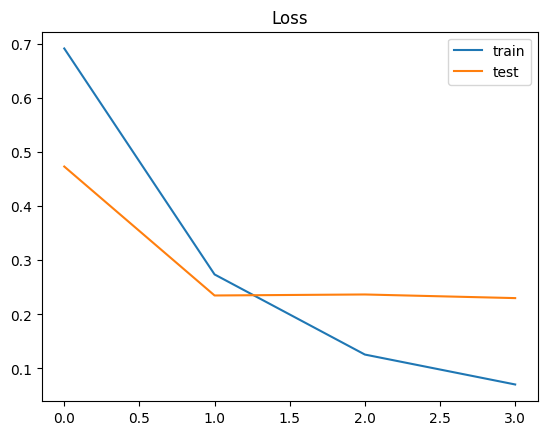

In [28]:
plt.title('Loss')
plt.plot(model_lstm.history['loss'], label='train')
plt.plot(model_lstm.history['val_loss'], label='test')
plt.legend()
plt.show();

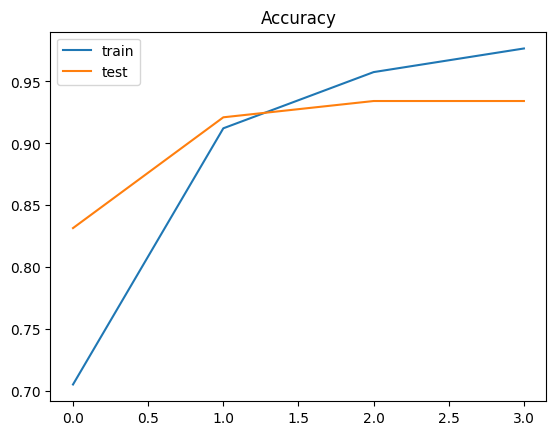

In [29]:
plt.title('Accuracy')
plt.plot(model_lstm.history['accuracy'], label='train')
plt.plot(model_lstm.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [30]:
predictions=[]
pred = model.predict(X_test)
for x in pred:
    labels = ['Neu','Pos','Neg']
    predictions.append(labels[np.argmax(x)])
predictions=np.array(predictions)
predictions

24/24 [==============================] - 1s 12ms/step


array(['Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg',
       'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neu', 'Pos', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neu', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neu', 'Pos', 'Pos', 'Neg', 'Neu', 'Neu', 'Neu', 'Neg',
       'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neu', 'Pos', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neu', 'Neu',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neu', 'Neg', 'Neg', 'Neu',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Neg',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Pos', 'Neg',

In [31]:
new_pred=[]
for x in predictions:
    if x=='Pos':
        new_pred.append([1,0,0])
    if x=='Neu':
        new_pred.append([0,1,0])
    if x=='Neg':
        new_pred.append([0,0,1])
new_pred=np.array(new_pred)
print(metrics.classification_report(Y_test,new_pred))

              precision    recall  f1-score   support

           0       0.03      0.03      0.03       134
           1       0.09      0.09      0.09       127
           2       0.95      0.98      0.97       499

   micro avg       0.66      0.66      0.66       760
   macro avg       0.36      0.37      0.36       760
weighted avg       0.65      0.66      0.65       760
 samples avg       0.66      0.66      0.66       760



In [32]:
Test_accuracy=metrics.accuracy_score(Y_test,new_pred)
Test_accuracy

0.6631578947368421

In [34]:
import sklearn.externals

In [37]:
!pip install joblib

In [39]:
import os
os.getcwd()

'/content'

In [41]:
import joblib

In [42]:
joblib.dump(model, 'Final_LSTM.pkl', protocol=2)

['Final_LSTM.pkl']